# Introduction

Until now, the only optimizer we know is GD (and the two variants) but there are other optimizers which are quite faster than GD:
1. Momentum Optimization
2. Nesterov Accelerated Gradient
3. AdaGrad
4. RMSProp
5. Adam, Nadam, and AdaMax
6. And so on...

Basically they are just another formulas for updating the weights (same job as GD). Here we will talk about the two of them that are really famous; RMSProp and Adam.

# RMSProp

Created in 2012 by Geoffrey Hinton and Tijmen Tieleman for their Coursera class. The algorithm wasn't published in a paper (!) and you can find it in the 29th slide in the [lecture](https://homl.info/57). ([Video here](https://homl.info/58))

Remember that with $K$ being the gradients of the cost function with regard to the weight ($K = \nabla_\theta E(\theta)$), GD does this:
$$
\theta = \theta - \alpha K
$$

RMSProp does this:
$$
s = \beta s + (1-\beta)K\odot K \newline
\theta = \theta - \alpha K / \sqrt{s + \epsilon}
$$
With $\odot$ being elemnt-wise multiplication, $/$ being element-wise division (there was no symbol for that!), and $\beta$ being a new hyperparameter that you need to tune.

## Reason Behind the Formula

RMSProp is the improved version of AdaGrad which fixes the one problem that AdaGrad has which is the risk of slowing down fast and never converging by using exponential decay (the $\beta$ part). By the way, AdaGrad is exactly like RMSProp without the $\beta$ part.

### AdaGrad (a bit)

If our cost function looked like an elongated bowl, then GD would go down the steepest slope which is not pointing straight to the global min. AdaGrad solves this by correcting its direction and pointing a bit more toward the global min (scaling down the gradient along the steepest dimension which is equal to the second part).

The down-scale part is equivalent to decaying the learning rate (faster for steep dimensions and slower for the other ones).

One problem though is that AdaGrad often stops too early before reaching the global min because the learning rate gets scaled down so much. Using AdaGrad isn't recommended but it's essential for understanding other optimizers.

# Adam

RMSProp was the preferred optimizer until Adam arrived. Adam combines the ideas from RMSProp (keeping track of the past **squared** gradients) and momentum optimization (keeping track of the past gradients). Here is the formula (it does look a bit scary but it's really easy to understand):

$$
m = \beta_1 m - (1 - \beta_1) K \newline
M = \frac{m}{1 - \beta_1^t}\newline
s = \beta_2 s + (1 - \beta_2) K \odot K \newline
S = \frac{s}{1 - \beta_2^t}\newline
\theta = \theta + \alpha M / \sqrt{S + \epsilon} \newline
$$
With $\odot$ and $/$ having the same meanings as before, and $t$ being the iteration number.

The first two lines do the momentum job where the later two do RMSProp. The $M$ and $S$ part are used for boosting $m$ and $s$ during training since they start from 0 and are biased toward that at the beginning.

The $\beta_1$ and $\beta_2$ are often initialized to 0.9 and 0.999 respectively.

# Final Notes

All of these optimizers are based on first-order derivative (Jacobians). There exists second-order derivatives too called Hessians but they're really hard to apply to DNNs since there are $n^2$ derivatives per output which results into very slow training.

Here you can find the comparison between all the optimizers here:
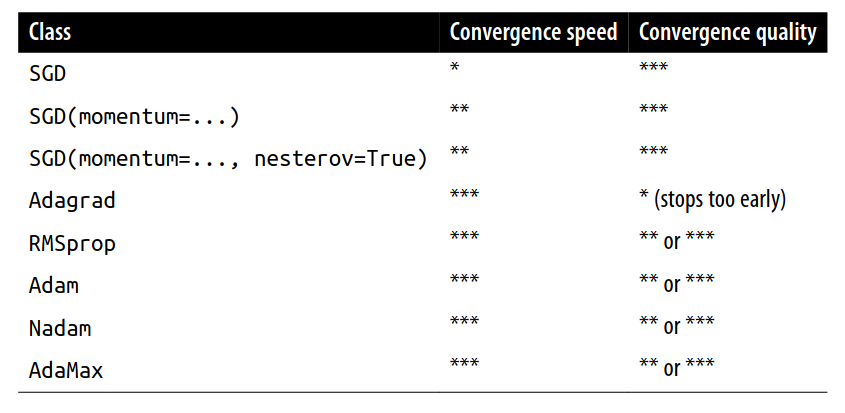

Note that nowadays, you want to often use Adam or RMSProp. Other cases rarely happen.

# HOMEWORK

Implement the Adam method from scratch and test it using a dataset (you could use the one shown at the start of this session).